In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/7r3y70dd/dataSheets/refs/heads/main/Accidental_Drug_Related_Deaths_2012-2018.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5105 entries, 0 to 5104
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5105 non-null   object 
 1   Date                 5103 non-null   object 
 2   DateType             5103 non-null   object 
 3   Age                  5102 non-null   float64
 4   Sex                  5099 non-null   object 
 5   Race                 5092 non-null   object 
 6   ResidenceCity        4932 non-null   object 
 7   ResidenceCounty      4308 non-null   object 
 8   ResidenceState       3556 non-null   object 
 9   DeathCity            5100 non-null   object 
 10  DeathCounty          4005 non-null   object 
 11  Location             5081 non-null   object 
 12  LocationifOther      590 non-null    object 
 13  DescriptionofInjury  4325 non-null   object 
 14  InjuryPlace          5039 non-null   object 
 15  InjuryCity           3349 non-null   o

In [33]:
(df['COD'].str.contains('and Fentanyl') == True).mean()

0.060528893241919686

<Axes: ylabel='OtherSignifican'>

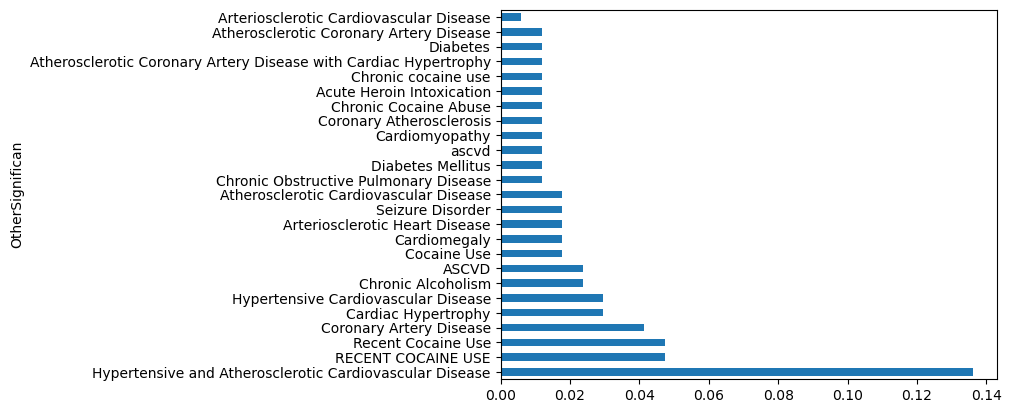

In [35]:
df['OtherSignifican'].value_counts(normalize=True)[:25].plot.barh()

##### plt.figure(figsize=(6, 8))
df.isna().mean().sort_values().plot.barh();

In [5]:
df['Location'].value_counts()

Location
Residence            2677
Hospital             1626
Other                 773
Convalescent Home       3
Nursing Home            1
Hospice                 1
Name: count, dtype: int64

In [6]:
df['MannerofDeath'].value_counts()

MannerofDeath
Accident    5066
Pending       14
accident      13
ACCIDENT       1
Natural        1
Name: count, dtype: int64

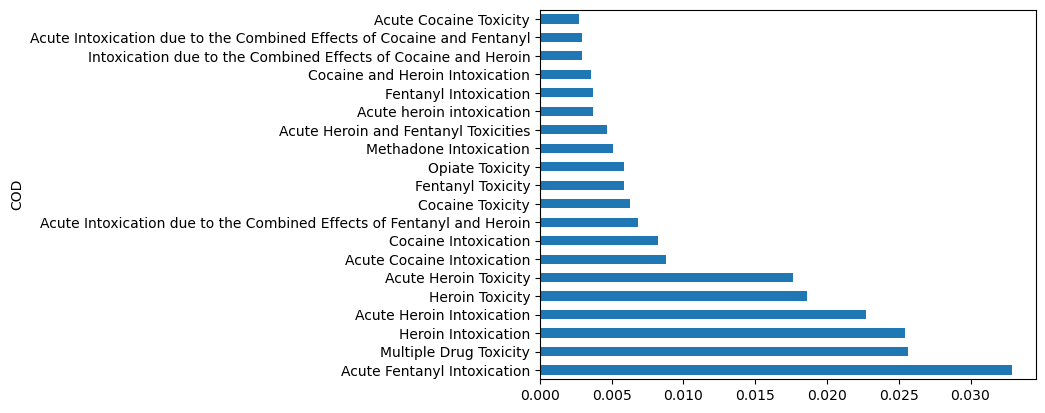

In [7]:
df['COD'].value_counts(normalize=True)[:20].plot.barh();

In [8]:
df['InjuryPlace'].value_counts()

InjuryPlace
Residence                 3601
Other                      269
Residential Building       241
Hotel or Motel             227
Unknown                    176
                          ... 
Campgrounds                  1
residential building         1
Shopping Center              1
Residential building         1
River, Stream or Canal       1
Name: count, Length: 71, dtype: int64

In [9]:
df['DescriptionofInjury'].value_counts()

DescriptionofInjury
Substance Abuse          1618
Drug Use                  491
Substance abuse           402
Ingestion                 334
substance abuse           298
                         ... 
Ingested Opiod              1
Abused medication           1
Used opiates                1
Inhalation; Ingestion       1
SUBSTANCE  ABUSE            1
Name: count, Length: 320, dtype: int64

In [10]:
drug_columns = [
    'Heroin', 'Cocaine', 'Fentanyl', 'FentanylAnalogue', 'Oxycodone', 
    'Oxymorphone', 'Ethanol', 'Hydrocodone', 'Benzodiazepine', 'Methadone',
    'Amphet', 'Tramad', 'Morphine_NotHeroin', 'Hydromorphone',
    'OpiateNOS', 'AnyOpioid'
]

for col in drug_columns:
    print(f"Unique values in {col}: {df[col].unique()}")

(df == 'Y').sum()

Unique values in Heroin: [nan 'Y']
Unique values in Cocaine: [nan 'Y']
Unique values in Fentanyl: ['Y' nan 'Y-A' 'Y POPS' 'Y (PTCH)']
Unique values in FentanylAnalogue: [nan 'Y']
Unique values in Oxycodone: [nan 'Y']
Unique values in Oxymorphone: [nan 'Y']
Unique values in Ethanol: [nan 'Y']
Unique values in Hydrocodone: ['Y' nan]
Unique values in Benzodiazepine: ['Y' nan]
Unique values in Methadone: [nan 'Y']
Unique values in Amphet: [nan 'Y']
Unique values in Tramad: [nan 'Y']
Unique values in Morphine_NotHeroin: [nan 'Y' 'YES' 'STOLE MEDS' 'NO RX BUT STRAWS' 'PCP NEG']
Unique values in Hydromorphone: [nan 'Y']
Unique values in OpiateNOS: [nan 'Y']
Unique values in AnyOpioid: [nan 'Y' 'N']


ID                        0
Date                      0
DateType                  0
Age                       0
Sex                       0
Race                      0
ResidenceCity             0
ResidenceCounty           0
ResidenceState            0
DeathCity                 0
DeathCounty               0
Location                  0
LocationifOther           0
DescriptionofInjury       0
InjuryPlace               0
InjuryCity                0
InjuryCounty              0
InjuryState               0
COD                       0
OtherSignifican           0
Heroin                 2529
Cocaine                1521
Fentanyl               2228
FentanylAnalogue        389
Oxycodone               607
Oxymorphone             108
Ethanol                1247
Hydrocodone             118
Benzodiazepine         1343
Methadone               474
Amphet                  159
Tramad                  130
Morphine_NotHeroin       38
Hydromorphone            25
Other                     0
OpiateNOS           

In [11]:
df.head()


,ID,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,DeathCity,...,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeo,ResidenceCityGeo,InjuryCityGeo,Town Index
0,14-0273,06/28/2014 12:00:00 AM,DateReported,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Accident,"CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)",83.0
1,13-0102,03/21/2013 12:00:00 AM,DateofDeath,48.0,Male,Black,NORWALK,NaN,NaN,NORWALK,...,NaN,NaN,NaN,NaN,NaN,Accident,"Norwalk, CT\n(41.11805, -73.412906)","NORWALK, CT\n(41.11805, -73.412906)","CT\n(41.575155, -72.738288)",103.0
2,16-0165,03/13/2016 12:00:00 AM,DateofDeath,30.0,Female,White,SANDY HOOK,FAIRFIELD,CT,DANBURY,...,NaN,NaN,NaN,NaN,Y,Accident,"Danbury, CT\n(41.393666, -73.451539)","SANDY HOOK, CT\n(41.419998, -73.282501)",NaN,34.0
3,16-0208,03/31/2016 12:00:00 AM,DateofDeath,23.0,Male,White,RYE,WESTCHESTER,NY,GREENWICH,...,NaN,NaN,NaN,NaN,Y,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,NaN,57.0
4,13-0052,02/13/2013 12:00:00 AM,DateofDeath,22.0,Male,"Asian, Other",FLUSHING,QUEENS,NaN,GREENWICH,...,NaN,NaN,NaN,NaN,NaN,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,"CT\n(41.575155, -72.738288)",57.0


<Axes: >

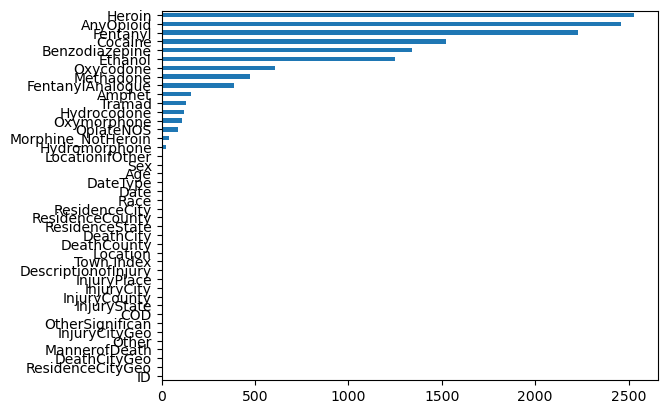

In [12]:
(df == 'Y').sum().sort_values().plot.barh()

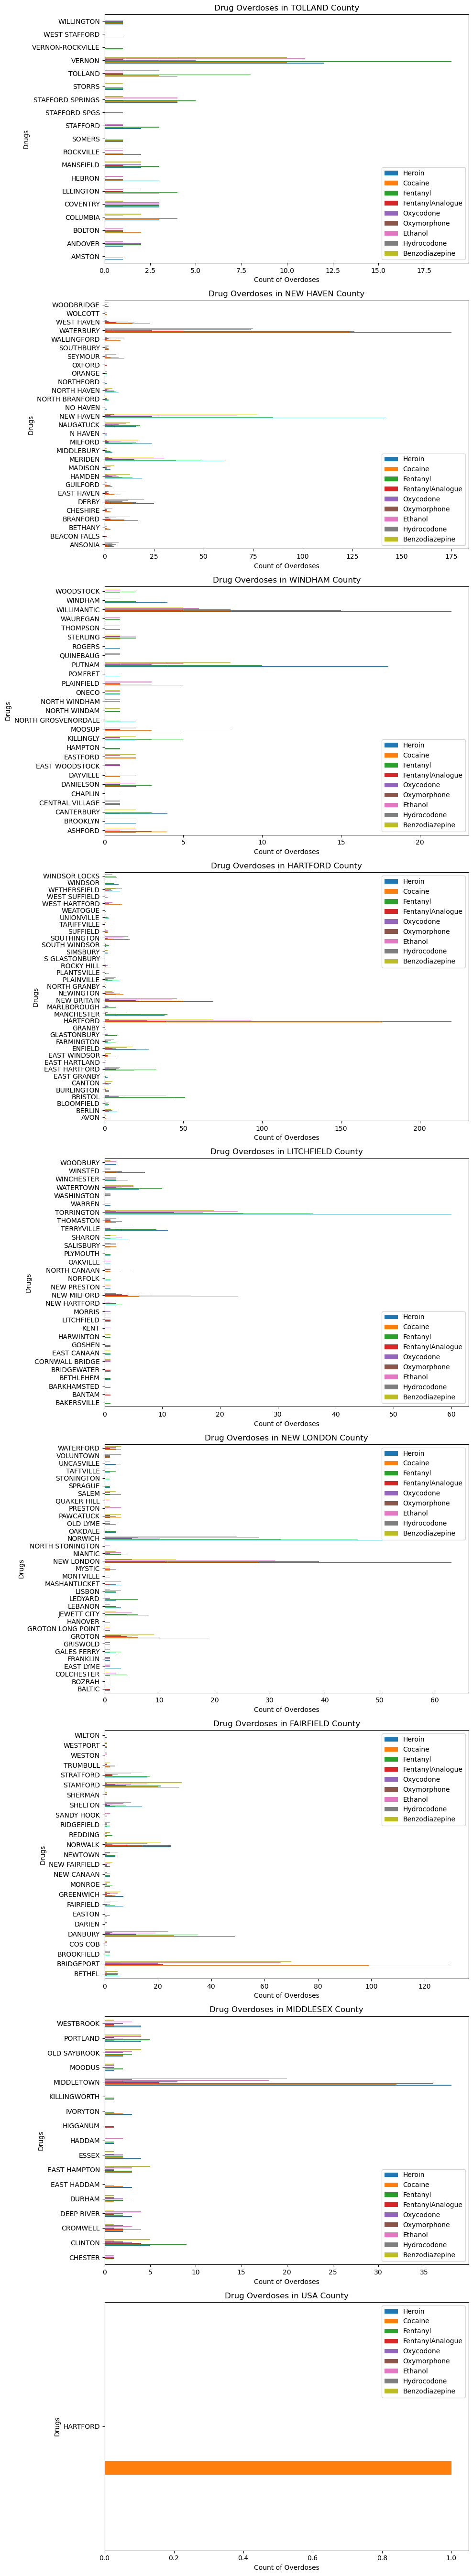

In [15]:
# drug_columns = [
#     'Heroin', 'Cocaine', 'Fentanyl', 'FentanylAnalogue', 'Oxycodone', 'Oxymorphone',
#     'Ethanol', 'Hydrocodone', 'Benzodiazepine', 'Methadone', 'Amphet', 'Tramad', 
#     'Morphine_NotHeroin', 'Hydromorphone', 'Other', 'OpiateNOS'
# ]

# filtered_data = df[df[drug_columns].eq('Y').any(axis=1)]

# grouped_data = filtered_data.groupby(['DeathCity', 'DeathCounty', 'Location'])[drug_columns].apply(lambda x: (x == 'Y').sum())

# grouped_data.plot.barh()

drug_columns = [
    'Heroin', 'Cocaine', 'Fentanyl', 'FentanylAnalogue', 'Oxycodone', 'Oxymorphone',
    'Ethanol', 'Hydrocodone', 'Benzodiazepine'
]

filtered_data = df[df[drug_columns].eq('Y').any(axis=1)]

grouped_data = filtered_data.groupby(['DeathCity', 'DeathCounty'])[drug_columns].apply(lambda x: (x == 'Y').sum())

deathcounties = grouped_data.index.get_level_values('DeathCounty').unique()

fig, axes = plt.subplots(len(deathcounties), 1, figsize=(10, 6 * len(deathcounties)))

if len(deathcounties) == 1:
    axes = [axes]

for i, county in enumerate(deathcounties):
    ax = axes[i]
    # Filter the grouped_data for the current DeathCounty
    county_data = grouped_data.xs(county, level='DeathCounty')
    county_data.plot.barh(ax=ax, title=f"Drug Overdoses in {county} County")
    ax.set_xlabel("Count of Overdoses")
    ax.set_ylabel("Drugs")

plt.tight_layout()
plt.show()

In [ ]:
value_map = {
    'Y': 1,
    'N': 0,
    'Y-A': 1,
    'Y POPS': 1,
    'Y (PTCH)': 1,
    'YES': 1,
    'STOLE MEDS': 1,
    'NO RX BUT STRAWS': 1,
    'PCP NEG': 0,
    np.nan: 0
}

df[drug_columns] = df[drug_columns].replace(value_map).fillna(0)

df[drug_columns] = df[drug_columns].astype(int)

correlation_matrix = df[drug_columns].corr()

sns.heatmap(correlation_matrix, cmap='coolwarm')

In [ ]:
city_totals = df.groupby('ResidenceCity')[drug_columns].count()

total_drugs_per_city = city_totals.sum(axis=1)

top10 = total_drugs_per_city.nlargest(10)

print(top10)

In [ ]:
top_cities = top10.index

top_cities_df = df[df['ResidenceCity'].isin(top_cities)]

city_drug_totals = top_cities_df.groupby('ResidenceCity')[drug_columns].sum()

city_totals = city_drug_totals.sum(axis=1)

drug_probabilities = city_drug_totals.div(city_totals, axis=0)

drug_probabilities = drug_probabilities.loc[top_cities]

sns.heatmap(drug_probabilities)